# Tutorial for Visualization

This tutorial contains some examples for the visualization of the different objects dealt with in polymake.


## Intro

The most straighforward way of visualizing things in `polymake` is by using the `VISUAL` method that visualizable objects provide. For example, you can look at the 3-simplex by doing this:

    


In [ ]:
simplex(3)->VISUAL;


By default, this will open `jReality` and show you a tetrahedron in a pretty color. See the [visual_tutorial#Backends](visual_tutorial#Backends) section for more information on using other backends.


To get a list of visualization methods available, you can use the build-in help system. To obtain the visualization possibilities for, e.g., Polytopes in application `polytope`, type:

    


In [ ]:
help 'objects/Polytope/methods/Visualization';

    
    Subtopics of objects/Polytope/methods/Visualization:
    GALE, SCHLEGEL, VISUAL, VISUAL_BOUNDED_GRAPH, VISUAL_DUAL, VISUAL_DUAL_FACE_LATTICE,
    VISUAL_DUAL_GRAPH, VISUAL_FACE_LATTICE, VISUAL_GRAPH, VISUAL_TRIANGULATION_BOUNDARY

Most visualization methods provide a variety of parameters. Get a list for the method of yout choice (here: `VISUAL`) by typing

    


In [ ]:
help 'objects/Polytope/methods/Visualization/VISUAL';


The syntax for passing parameters can be seen in this example:

    
    simplex(3)->VISUAL(EdgeThickness => 10);

It visualizes a tetrahedron with really thick edges. See the section on [visual_tutorial#application polytope](visual_tutorial#application polytope) for more.

### Specifying colors

Some visualization methods requite you to specify colors. There are various ways of doing this in polymake, i.e. the color red may be given by

*  the String `'red`', which will be looked up in rgb.txt to obtain the rgb values,

*  the String `'1 0 0`', which contains three decimal values in the interval [0,1] corresponding to the 'r g b'-values of the color,

*  the String `'255 0 0`', which contains three integer values in the interval [0,255] corresponding to the 'r g b'-values of the color,

*  an object `new RGB(1,0,0)` of polymake's RGB class.

## application polytope

The application 'polytope' contains a large amount of visualization routines. Most
of them allow you to change the way things look a various ways. See the following
subsections for examples.

### Changing vertex attributes 

It is possible to change the way the vertices are displayed directly from the command line. In the following we will explain how to change the color, labels, and size of the vertices.

#### Colors

There are different ways to specify the colors of the vertices. You may choose a single color for all vertices or set each vertex color individually. 

**Single color**: To specify one color for all vertices use the *VertexColor* attribute of the *VISUAL* method: 

    


In [ ]:
simplex(3)->VISUAL(VertexColor=> '0 100 200');





You can also change the colors in the visualization backends (e.g. jReality). How to do this is explained below.

To set the colors of the vertices individually, you can either specify an array that contains a color for each of the vertices or a perl function, i.e. `sub {...}`, that returns a color depending on the vertex index.

**Array of colors**: Instead of passing one color to the *VertexColor* attribute, you can pass an array of colors:

    


In [ ]:
simplex(3)->VISUAL(VertexColor=>['red','green','blue','yellow']);



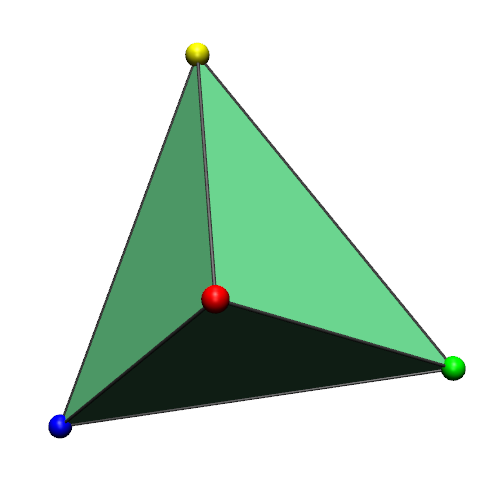

The following line produces the same picture but each color is specified using a different color format: 

    
     polytope > simplex(3)->VISUAL(VertexColor=>['red','0 1 0',new RGB(0,0,1),'255 255 0']); 


See [](visual_tutorial#Specifying Colors) for different ways to specify colors.

**Function**: You may also pass a function, i.e. a perl `sub`, to the *VertexColors* attribute that returns a color depending on the vertex index. The following line produces a tetrahedron with colors ranging from black for vertex 0 to yellow for vertex 3:

    
     polytope > simplex(3)->VISUAL(VertexColor=> sub { $i = shift; new RGB($i*0.33,$i*0.33,0); });




#### Labels

The labels can be specified either by an array or a function that returns a label depending on the index of the vertex.

** Array of labels **: To label the vertices of a tetrahedron by A, B, C, and D we just pass the array `["A", "B", "C", "D"]` to the *VertexLabels* attribute:

    


In [ ]:
simplex(3)->VISUAL(VertexLabels=>["A", "B", "C", "D"]);



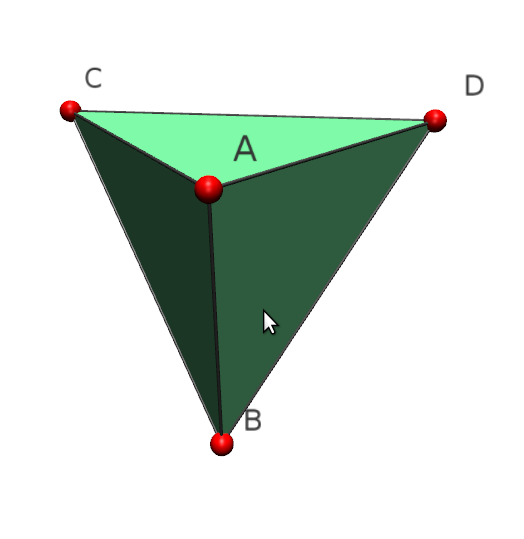

If you want to set only one label for example, you can do so by passing the empty string `""` for the other vertices:

    


In [ ]:
simplex(3)->VISUAL(VertexLabels=>["", "", "My favorite vertex", ""]);



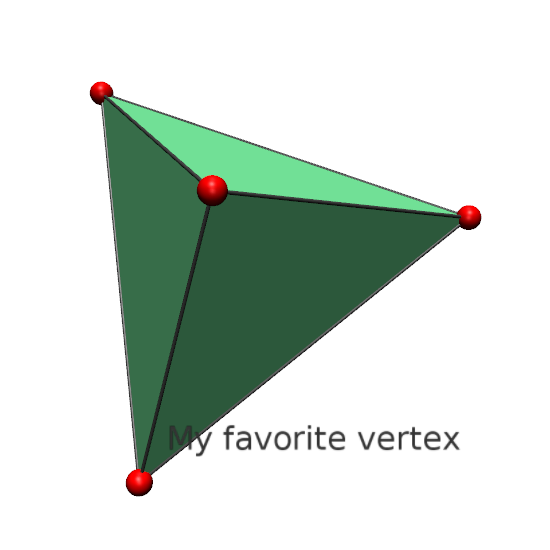

** Function **: We may also write a perl function that returns a label depending on the index of the vertex. For example, if we want to label the vertices by their coordinates, we can use the following commands:

    


In [ ]:
$tet = simplex(3);
$tet->VISUAL(VertexLabels=> sub { my $i = shift; return $tet->VERTICES->[$i]; });



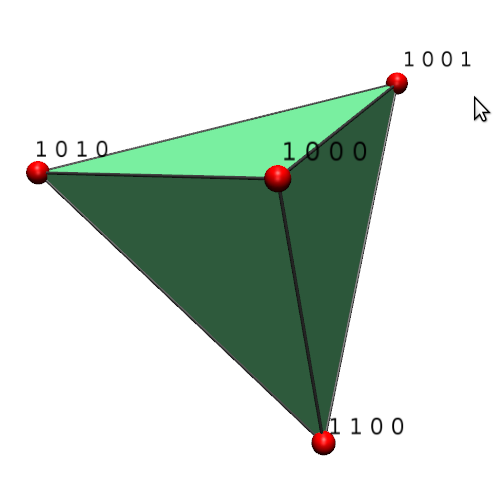

If you prefer dehomogenized float coordinates, then you need to use:

    


In [ ]:
$tet->VISUAL(VertexLabels=> sub { my $i = shift; return convert_to<Float>(dehomogenize($tet->VERTICES->[$i]));});



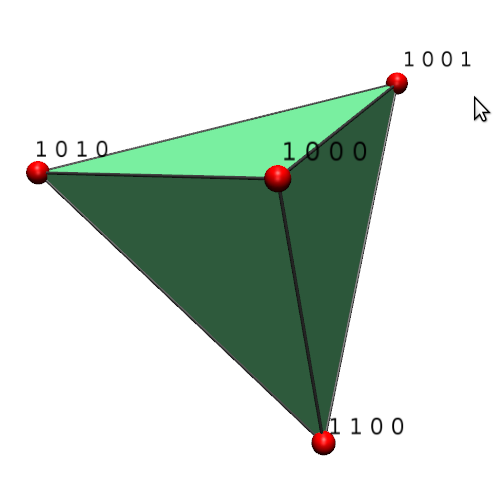

#### Vertex Size

Similar to changing the colors using the *VertexColor* attribute you are able to change the sizes of the vertices via the *VertexThickness*
attribute. Again, you may set the sizes of all vertices by a single value or use an array or a function to specify individual sizes.

** Single size **: To increase the size of the vertices, just pass a number larger than 1 to the *VertexThickness*

    


In [ ]:
simplex(3)->VISUAL(VertexThickness=>2);



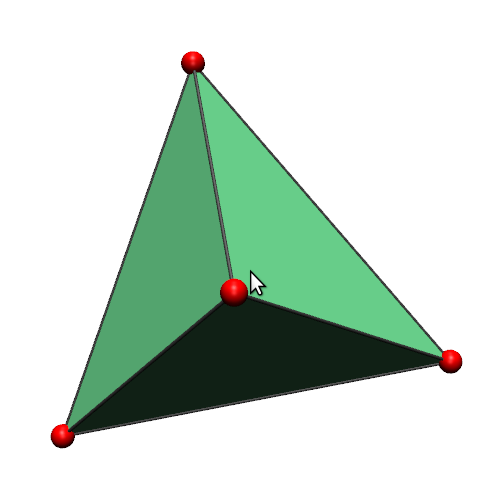
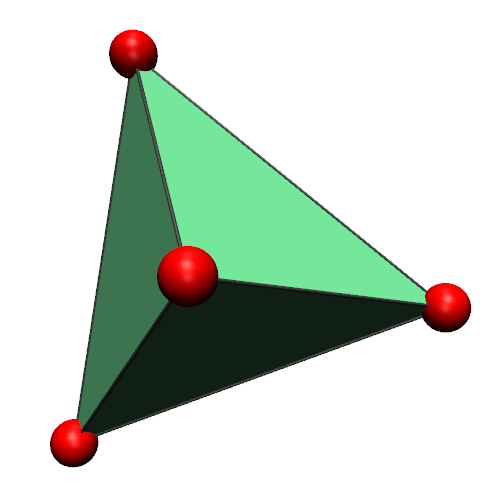

** Array of sizes **: As in the case of colors and labels, you may also specify individual sizes using an array:

    


In [ ]:
simplex(3)->VISUAL(VertexThickness=>[1,2,3,4]);



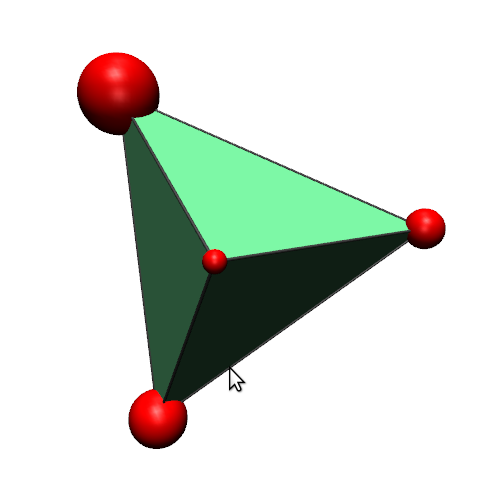

** Function **: You may define a function that returns the size of the vertex depending on the vertex index. The following
example sets the size of the odd vertices to 1 and the sizes of the even vertices to 2:

    


In [ ]:
cube(3)->VISUAL(VertexThickness=> sub { my $i = shift; if($i%2 == 0) { return 2; } else {return 1;} });



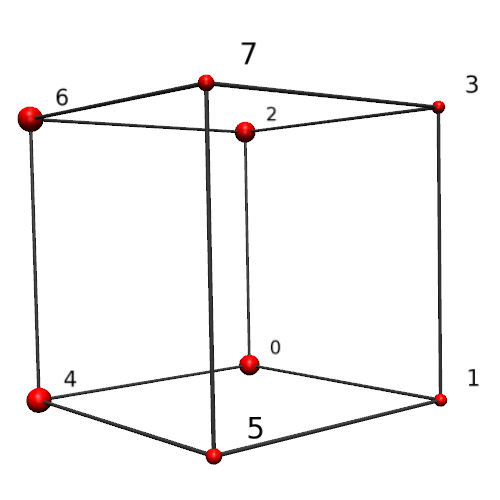

If you do not want to display the vertices at all, you can use the *VertexStyle* attribute and set it to `hidden`:

    


In [ ]:
cube(3)->VISUAL(VertexStyle=>"hidden");



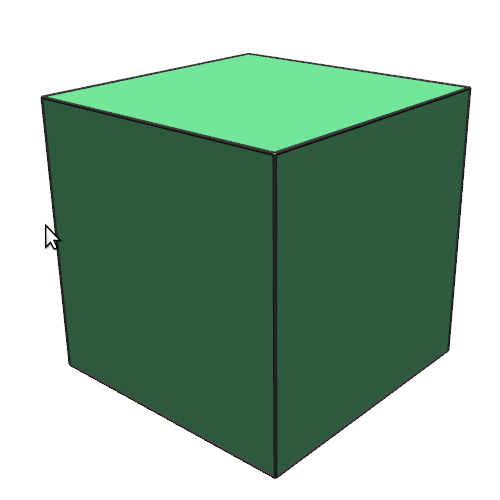

### Visualizing multiple polytopes

The following sequence creates a 0/1-cube and a translate.  The final command triggers the joint visualization of both.

    


In [ ]:
$c1=cube(3,0);
$c2=transform($c1,new Matrix<Rational>([[1,-1,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]));
compose($c1->VISUAL,$c2->VISUAL);



If `JavaView` is used for visualization then `Method:Effect:Explode Group of Geometries...` allows to show an explosion.

## application topaz

For information on how to visualize simlicial complexes and other topology-related objects, see [here](apps_topaz#visualization).

## Backends

'polymake' provides different visualization backends: jReality, JavaView, povray, postscript and even TikZ and Sketch are supported.
### TikZ and Sketch

Sketch is a script language which produces TikZ output. It is quite sophisticated. There is a interface from polymake to Sketch.

    :::perl


In [ ]:
$my_polytope = cube(3);
sketch($my_polytope->VISUAL,File=>"myfile.sketch");


When you downloaded the Sketch interpreter ([link](http://sketch4latex.sourceforge.net/)) you can use it to create your TikZ file via:

    :::perl
    sketch myfile.sketch > myfile.tikz


The drawback is that the produced TikZ code is quite cryptic and not really readable or editable anymore. If you do want to create TikZ code which is easier to edit afterwards, you might want to use polymake's TikZ interface via:

    :::perl


In [ ]:
tikz($my_polytope->VISUAL,File=>"myfile.tikz");


For a different viewing angle you may use jReality. Rotate the polytope into the position you want and click the `'save view`' button on the bottom of the jReality window. Then produce the TikZ or Sketch output.

### jReality

The jReality viewer offers a versatile perspective for your favourite tools on 4 Panel which may be enabled/disabled on the toolbar or using
the keyboard shortcuts Alt+Shift+(Up|Down|Left|Right) or the window menu. The "Visualization", "Split geometries", "Content Appearance",
and "Navigator" Plugin(usually in the Left- resp. Right-Slot) may be used to change the appearance of the displayed geometry. How to achieve your desired parameters is explained in the following section.


#### Appearance

There are several objects which control the appearance of a geometry in jreality:

 1.  geometry attributes,
 2.  appearances at a specific scene graph nodes, and
 3.  the content appearance.

The most versatile point to set different parameters for the appearance is via geometry attributes. This is needed, for example, if every vertex of the displayed
geometry should have its own thickness or color like in VISUAL_GRAPH->VERTEX_COLORS. These may only be edited via jreality's bean-shell, which requires
knowledge of the jreality API and in particular the attribute handling.

An appearance at a scene graph node (every VISUAL object is put into one of these) may have its own appearance which stores single values for colors/thicknesses
of vertices/edges/faces. Hence this does not allow, e.g., to assign a different color to each vertex. But editing is a little easier, since it is possible to use jreality's 
navigator. The navigator displays the entire scene graph. The polymake part of the scene graph starts with "root->content->Polymake Root". The VISUALs are stored
in seperate geometry nodes with its appearances. In each of the appearance you find the RenderingHints and Shader that either inherit properties of the content 
appearance or override them with their own values. This is already much less tedious than using the beanshell.

The content appearance comes into play if no other appearances exist in the content subtree, i.e. neither specific node appearances nor geometry attributes. The
sizes/thicknesses set in the content appearance are multiplied with the values of the specified values deeper in the tree, but colors will only apply if nothing else is
set.

So to be able to change the colors of the faces/edges/vertices of the geometry using the content appearance you need to get rid settings in the other appearances 
and geometry attributes. This may be done using the "clear attributes" and "clear appearance" item of the polymake menu.

#### Save View

Clicking the "Save View" button on the bottom of the jReality window attaches a "ViewTransformation" matrix to your object (read [this](reference/clients#attachments) if you don't know how attachments work). It contains the transformaiton necessary to convert the coordinates of your object to the coordinates of the (possibly rotated, translated etc. by you in the interactive visualization) object as you currently see it. This information is then used by jReality and Sketch to display the object in exactly that way if you visualize it the next time.




